In [1]:
# p.374 16.4 パーセプトロンに基づく線形回帰
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.optimizers import SGD

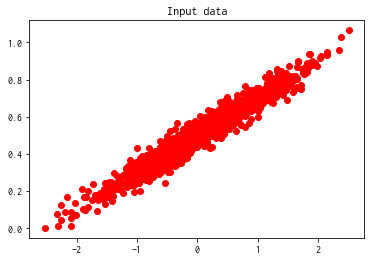

In [2]:
num_points = 1200
m = 0.2
c = 0.5
x_data = np.random.normal(0.0, 0.8, num_points)
noise = np.random.normal(0.0, 0.04, num_points)
y_data = m * x_data + c + noise

plt.figure()
plt.plot(x_data, y_data, 'ro')
plt.title('Input data')
plt.show()

In [3]:
num_iterations = 10

class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs):
        W = self.model.get_weights()[0][0][0]
        b = self.model.get_weights()[1][0]
        print('ITERATION', epoch+1)
        print('W =', W)
        print('b =', b)
        print('loss =', logs.get('loss'))
        
        plt.figure()
        plt.plot(x_data, y_data, 'ro')
        plt.plot(x_data, W * x_data + b)
        plt.title('Iteration ' + str(epoch+1) + ' of ' + str(num_iterations))
        plt.show()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
ITERATION 1
W = 0.22243693
b = 0.45435888
loss = 0.055205601860718614


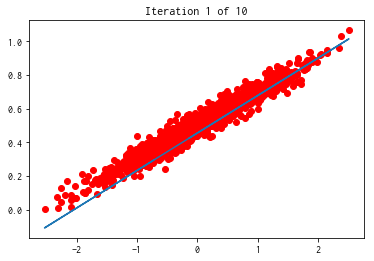

ITERATION 2
W = 0.2049686
b = 0.4960811
loss = 0.0020672440415259175


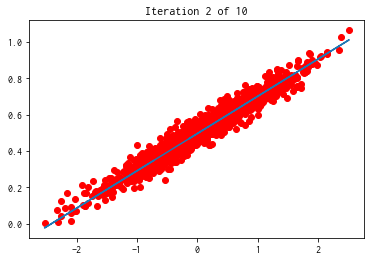

ITERATION 3
W = 0.20210296
b = 0.49968153
loss = 0.0015675035738405355


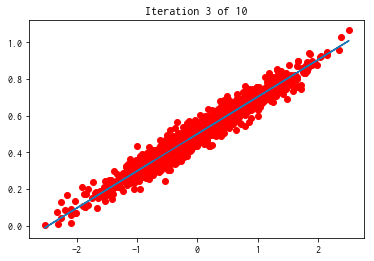

ITERATION 4
W = 0.2007349
b = 0.5004403
loss = 0.0015610946319241945


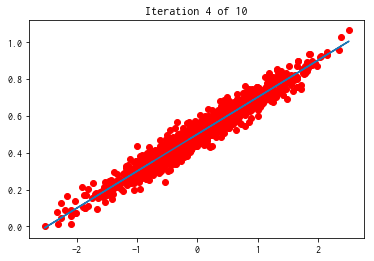

ITERATION 5
W = 0.20025472
b = 0.4996789
loss = 0.0015607229954015275


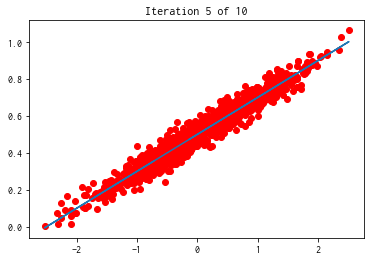

ITERATION 6
W = 0.19961537
b = 0.50034153
loss = 0.001560332800720241


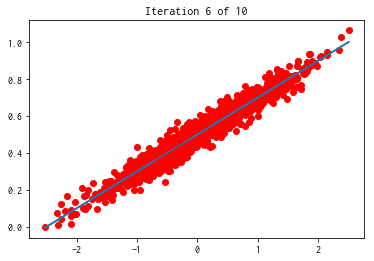

ITERATION 7
W = 0.1998917
b = 0.5007752
loss = 0.001560531567887479


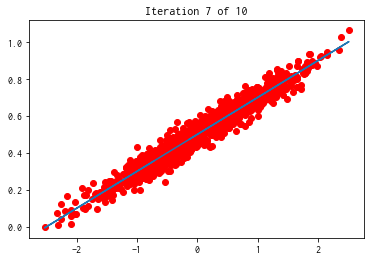

ITERATION 8
W = 0.20059747
b = 0.49831986
loss = 0.0015594119230236754


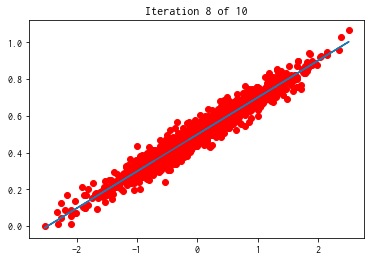

ITERATION 9
W = 0.20064038
b = 0.4992617
loss = 0.0015606714299402835


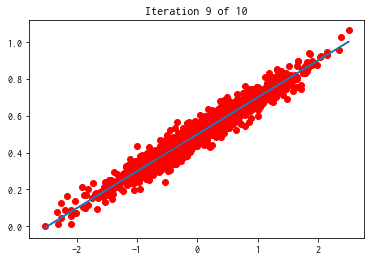

ITERATION 10
W = 0.19974668
b = 0.49905413
loss = 0.001560296374031882


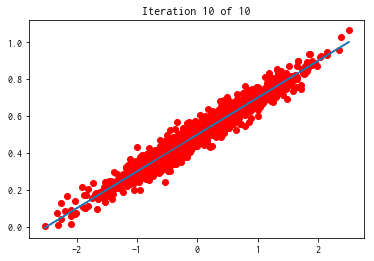

In [4]:
model = Sequential([
    Dense(1, activation='linear', input_shape=(1,), kernel_initializer=RandomUniform(-1.0, 1.0))
])

model.compile(loss='mse', optimizer=SGD(0.001))

history = model.fit(x_data, y_data, batch_size=1, epochs=num_iterations, verbose=0, callbacks=[MyCallback()])